In [3]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score
import matplotlib.pyplot as plt
df = pd.read_csv('TrainData.csv')
y_train = df['magsize']
df = df.drop(['magsize'],axis=1)
x_train = df.values
x_train = np.array(x_train)
y_train = np.array(y_train)
print(y_train)
print(x_train)

[1 2 3 2 3 1 2 1 2 1 2 2 1 3 2 3 2 2 2 3 2 3 2 3 2 2 2 2 2 2 1 2 1 1 2 1 2
 2 2 2 3 1 3 2 2 2 1 1 1 1 3 2 2 2 2 2 2 2 1 3 2 2 2 1 3 2 1 1 2 2 2 2 2 2
 3 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 3
 2 1 1 2 2 2 3 1 2 2 2 2 3 3 2 2 2 2 2 2 1 2 2 3 3 1 3 1 1 2 3 2 1 2 2 1 1
 2 3 2 1 1 3 1 3 2 2 2 2 2 2 3 2 2 1 1 2 3 2 2 2 1 1 1 3 3 3 2 2 3 3 2 2 2
 1 2 2 2 1 3 2 2 1 2 2 2 3 2 2 3 1 2 2 1 2 1 2 1 2 2 2 3 2 1 2 2 3 2 1 2 2
 3 2 2 3 2 2 1 2 3 1 1 1 2 2 2 1 1 2 1 2 2 1 1 1 3 3 2 2 2 2 2 1 2 3 3 1 1
 2 2]
[[0.00000000e+00 6.08877866e-01 3.14674930e-01 ... 3.23415300e-03
  4.77453580e-02 5.82524300e-03]
 [1.00000000e+00 8.52119124e-01 9.37675841e-01 ... 2.61966365e-01
  4.24403180e-02 2.13592230e-02]
 [2.00000000e+00 4.28618490e-01 9.08025541e-01 ... 4.59249677e-01
  2.46684350e-02 2.13592230e-02]
 ...
 [2.58000000e+02 6.08928605e-01 3.14678543e-01 ... 2.91073700e-03
  2.12201590e-02 1.16504850e-02]
 [2.59000000e+02 0.00000000e+00 3.37729202e-01 ... 1.58473480e-01
  

C:\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


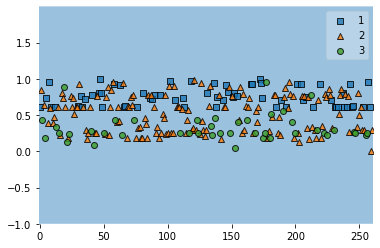

Logistic.score= 0.9425287356321839


In [4]:
lr = LogisticRegression(C=100.0,
                        random_state=1,
                        solver='lbfgs',
                        multi_class='ovr',
                        max_iter=2000
                       )
lr.fit(x_train, y_train)


value = 15
width = 25

plot_decision_regions(
    x_train,
    y_train,
    clf=lr,
    filler_feature_values={1: value, 2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value, 9: value, 10: value, 11: value, 12: value},
    filler_feature_ranges={1: width, 2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width, 9: width, 10: width, 11: width, 12: width}
) 
plt.show()
print("Logistic.score=", lr.score(x_train, y_train))

混亂矩陣
[[ 65   1   0]
 [  5 147   0]
 [  0   9  34]]
Accuracy: 0.943
Precision: 0.943
Recall: 0.943
F1: 0.943


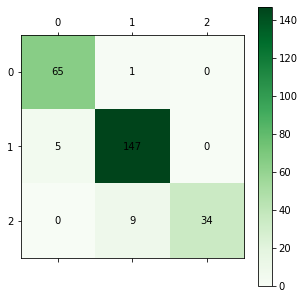

In [9]:
y_pred=lr.predict(x_train)
con=confusion_matrix(y_true=y_train,y_pred=y_pred)

print("混亂矩陣")
print(con)
print('Accuracy: %.3f' %accuracy_score(y_true=y_train,y_pred=y_pred))
print('Precision: %.3f' %precision_score(y_true=y_train,y_pred=y_pred, average='micro'))
print('Recall: %.3f' %recall_score(y_true=y_train,y_pred=y_pred, average='micro'))
print('F1: %.3f' %f1_score(y_true=y_train,y_pred=y_pred, average='micro'))


plt.rc('figure',figsize=(5,5))
 
plt.matshow(con,cmap = plt.cm.Greens) # 背景颜色
plt.colorbar() # 颜色標籤
 
# 内部添加圖例標籤
for x in range(len(con)):
    for y in range(len(con)):
        plt.annotate(con[y,x], xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')

plt.show()